MACHINE LEARNING, SUPERVISED ALGORITHM

HEART ABNORMALITY

Description: we have got lots of cardiovascular data from different patients. 

The objective is to create a supervised algorithm that predicts with that data, if that patient can have got or not a heart abnormaly.

LIBRARIES

In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

from mrmr import mrmr_classif

DATA

In [2]:
d_train = pd.read_csv('data_train.csv')
d_test = pd.read_csv('data_test.csv')

DATA ANALYSIS

In [3]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

In [7]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     200 non-null    float64
 1   TCSC    200 non-null    float64
 2   exp     200 non-null    int64  
 3   expmod  200 non-null    int64  
 4   cm      200 non-null    float64
 5   cvbin   200 non-null    float64
 6   frqbin  200 non-null    float64
 7   abin    200 non-null    int64  
 8   kurt    200 non-null    float64
 9   vfleak  200 non-null    float64
 10  M       200 non-null    float64
 11  A1      200 non-null    float64
 12  A2      200 non-null    float64
 13  A3      200 non-null    float64
 14  mav     200 non-null    float64
 15  psr     200 non-null    float64
 16  hilb    200 non-null    float64
 17  SamEn   200 non-null    float64
 18  x3      200 non-null    float64
 19  x4      200 non-null    int64  
 20  x5      200 non-null    float64
 21  x1      200 non-null    float64
 22  x2

In [6]:
d_test.head(5)

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,438.42,46.800,120,120,0.099658,0.16016,1.75,800,0.153170,0.58320,1.8463,0.013544,0.35512,1.03340,0.59693,0.092500,0.096250,0.16650,0.009658,9,1.8930,0.53153,0.003338,0.354,0.29044,1.6479,12.889,23.50,78.75,10.9500,0
1,449.10,46.467,60,120,0.119590,0.15713,1.75,805,-0.053068,0.60206,1.8556,0.010722,0.33294,1.07070,0.62901,0.090625,0.103120,0.17408,0.012657,12,1.8930,0.56449,0.002208,0.224,0.47144,1.7700,10.418,21.25,83.75,10.7210,0
2,466.82,49.533,90,135,0.099658,0.16490,1.75,792,-0.159920,0.58141,1.8511,0.007922,0.40213,1.11960,0.64374,0.092500,0.097500,0.16576,0.015831,12,1.8930,0.33149,0.002520,0.270,0.57652,2.0752,18.861,18.25,83.25,9.5106,0
3,549.38,52.600,120,120,0.089692,0.17177,1.75,780,-0.399490,0.59277,1.7017,0.000000,0.51941,0.81257,0.71385,0.073125,0.089375,0.12743,0.011373,15,1.8930,0.25013,0.001687,0.264,0.56407,1.9531,14.784,22.00,86.75,11.7990,0
4,426.55,56.533,135,105,0.119590,0.18101,2.25,763,-0.430150,0.51779,1.6104,0.014365,0.39363,0.71657,0.68439,0.088125,0.100000,0.19576,0.011764,16,2.0151,0.49224,0.001386,0.242,0.45114,1.4648,12.842,28.75,78.75,13.5370,0


The datasets consists a set of 30 parameters calculated from Electrocardiogram (ECG). 

The variable objective is VF, where 0 indicates a healthy person and 1 heart abnormality patient.


**Temporal Parameters** 

* TCI = threshold crossing interval 

* TCSC = threshold crossing sample count 

* Exp = exponential standard

* Expmod = modified exponential 

* MAV = mean absolute value

* count1 

* count2 

* count3

* x1

* x2

* bCP

**Spectral Parameters** 

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Time-Frequency Type Parameters**

* Li = based on ECG wave analysis.

**ECG Complexity Parameters** 

* CM = Complexity Measure

* CVbin = Covariance

* abin = area

* Frqbin = frequency

* Kurt = Kurtosis of Binary Signal Extracted from ECG

* PSR = Phase Space Reconstruction  

* HILB = Hilbert Transformation

* SamEn = Sample Entropy

In [7]:
d_train.duplicated().sum()

0

In [8]:
d_test.duplicated().sum()

0

<Axes: >

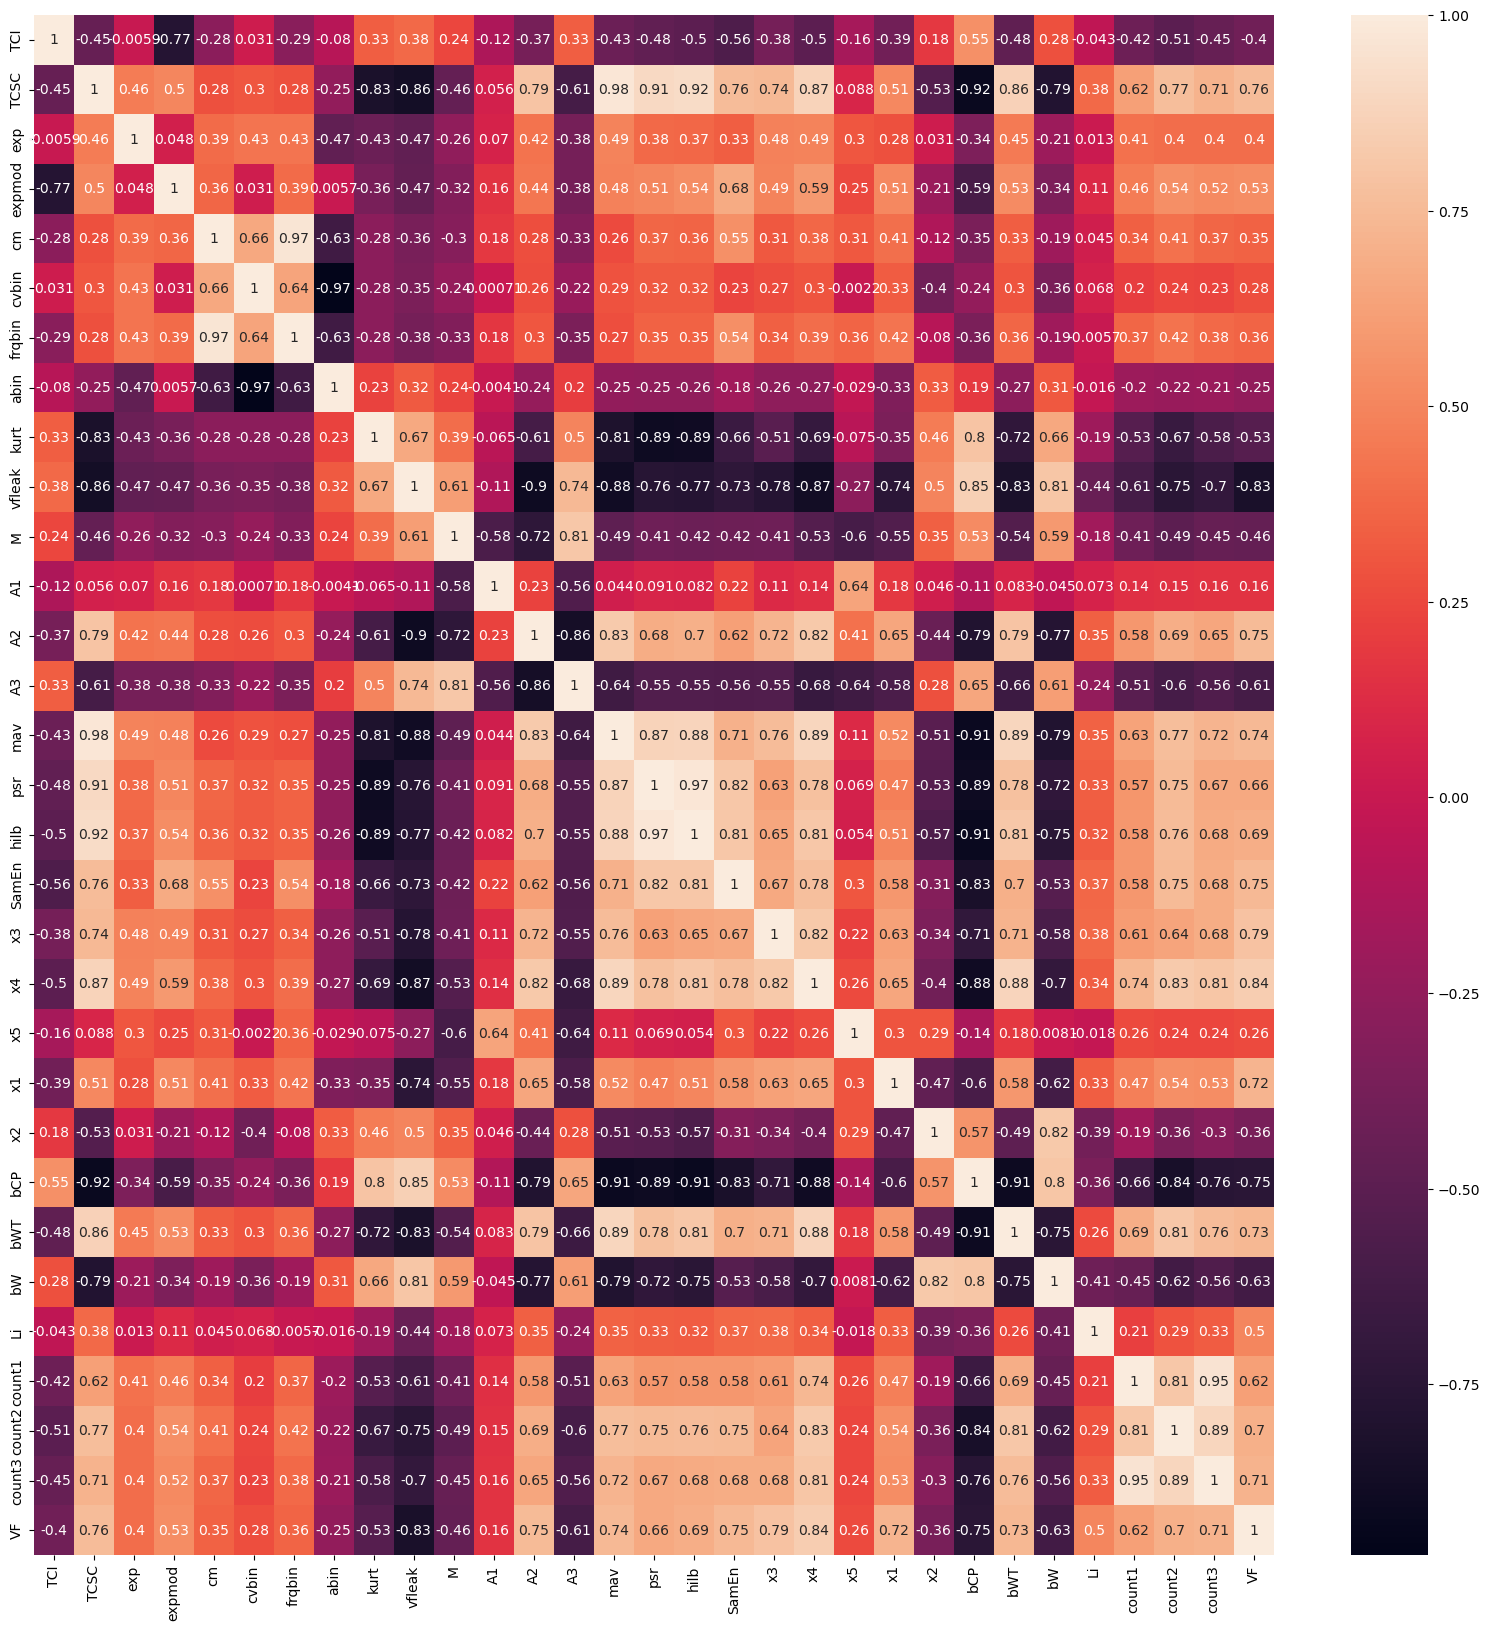

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(d_train.corr(), annot=True)

Corr more than 0.7

<Axes: >

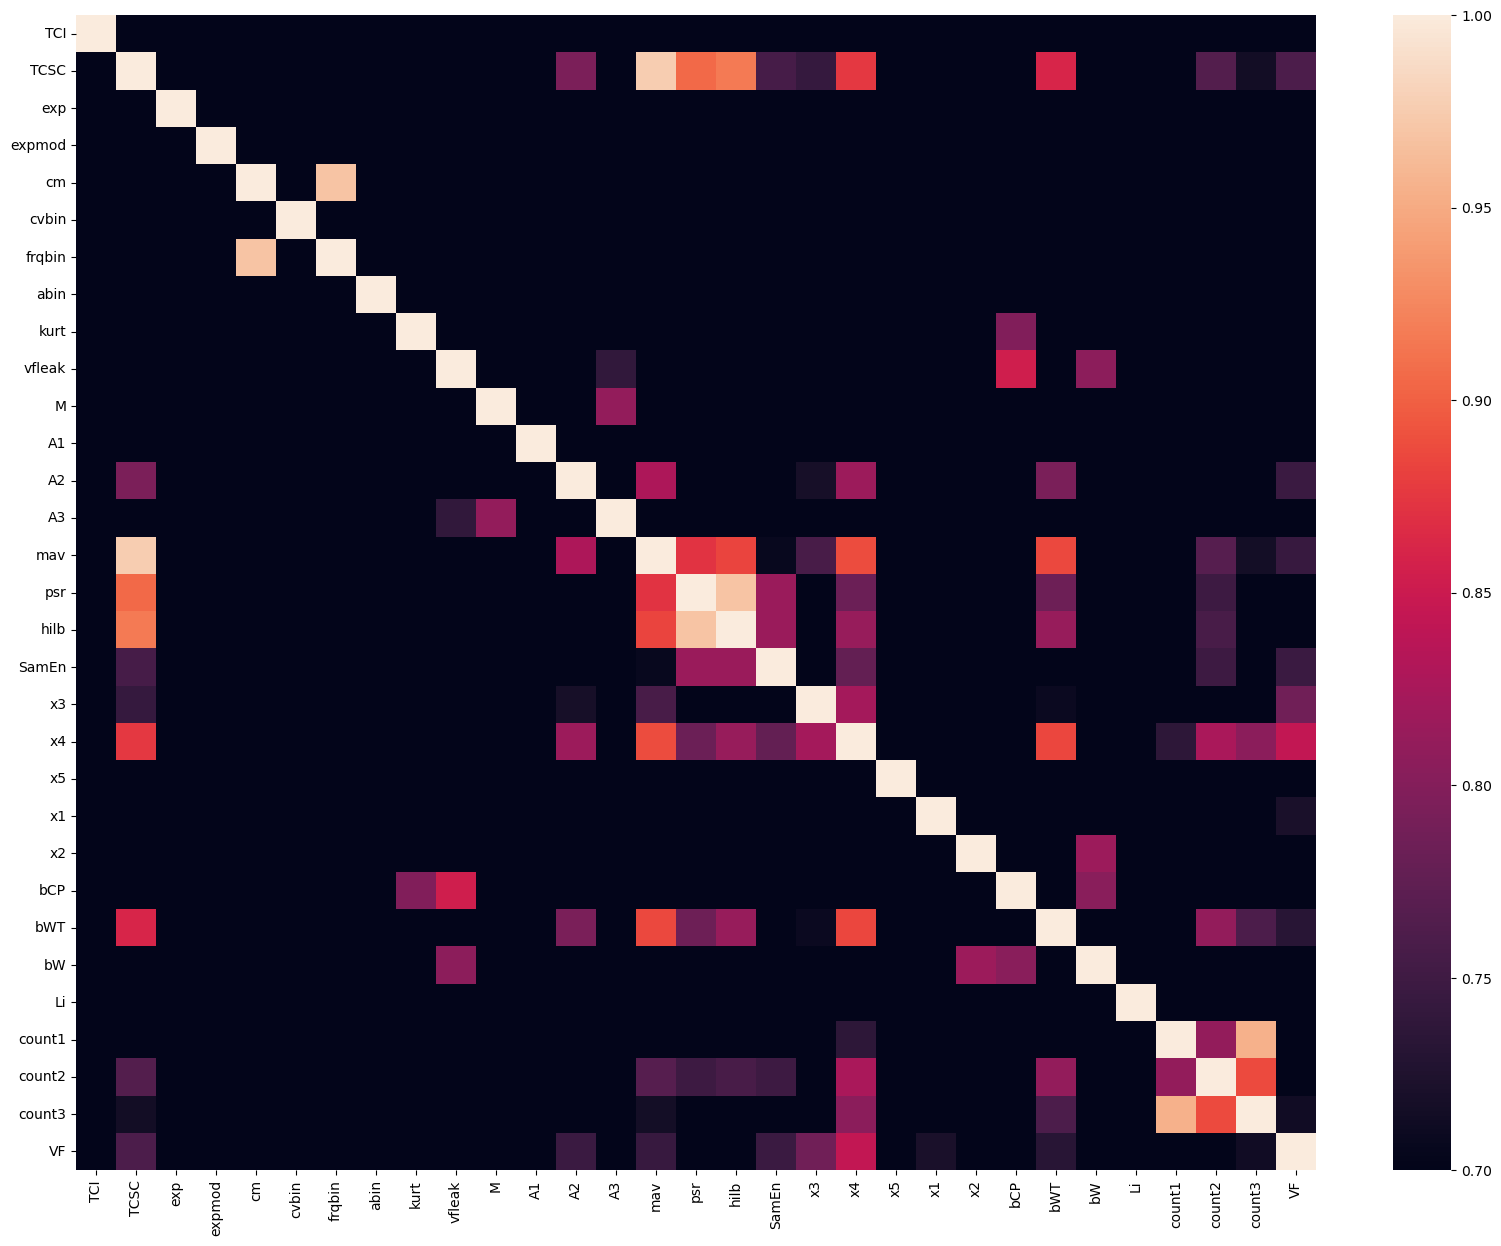

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(d_train.corr(), vmin=0.7, vmax= 1)

Corr less than -0.70

<Axes: >

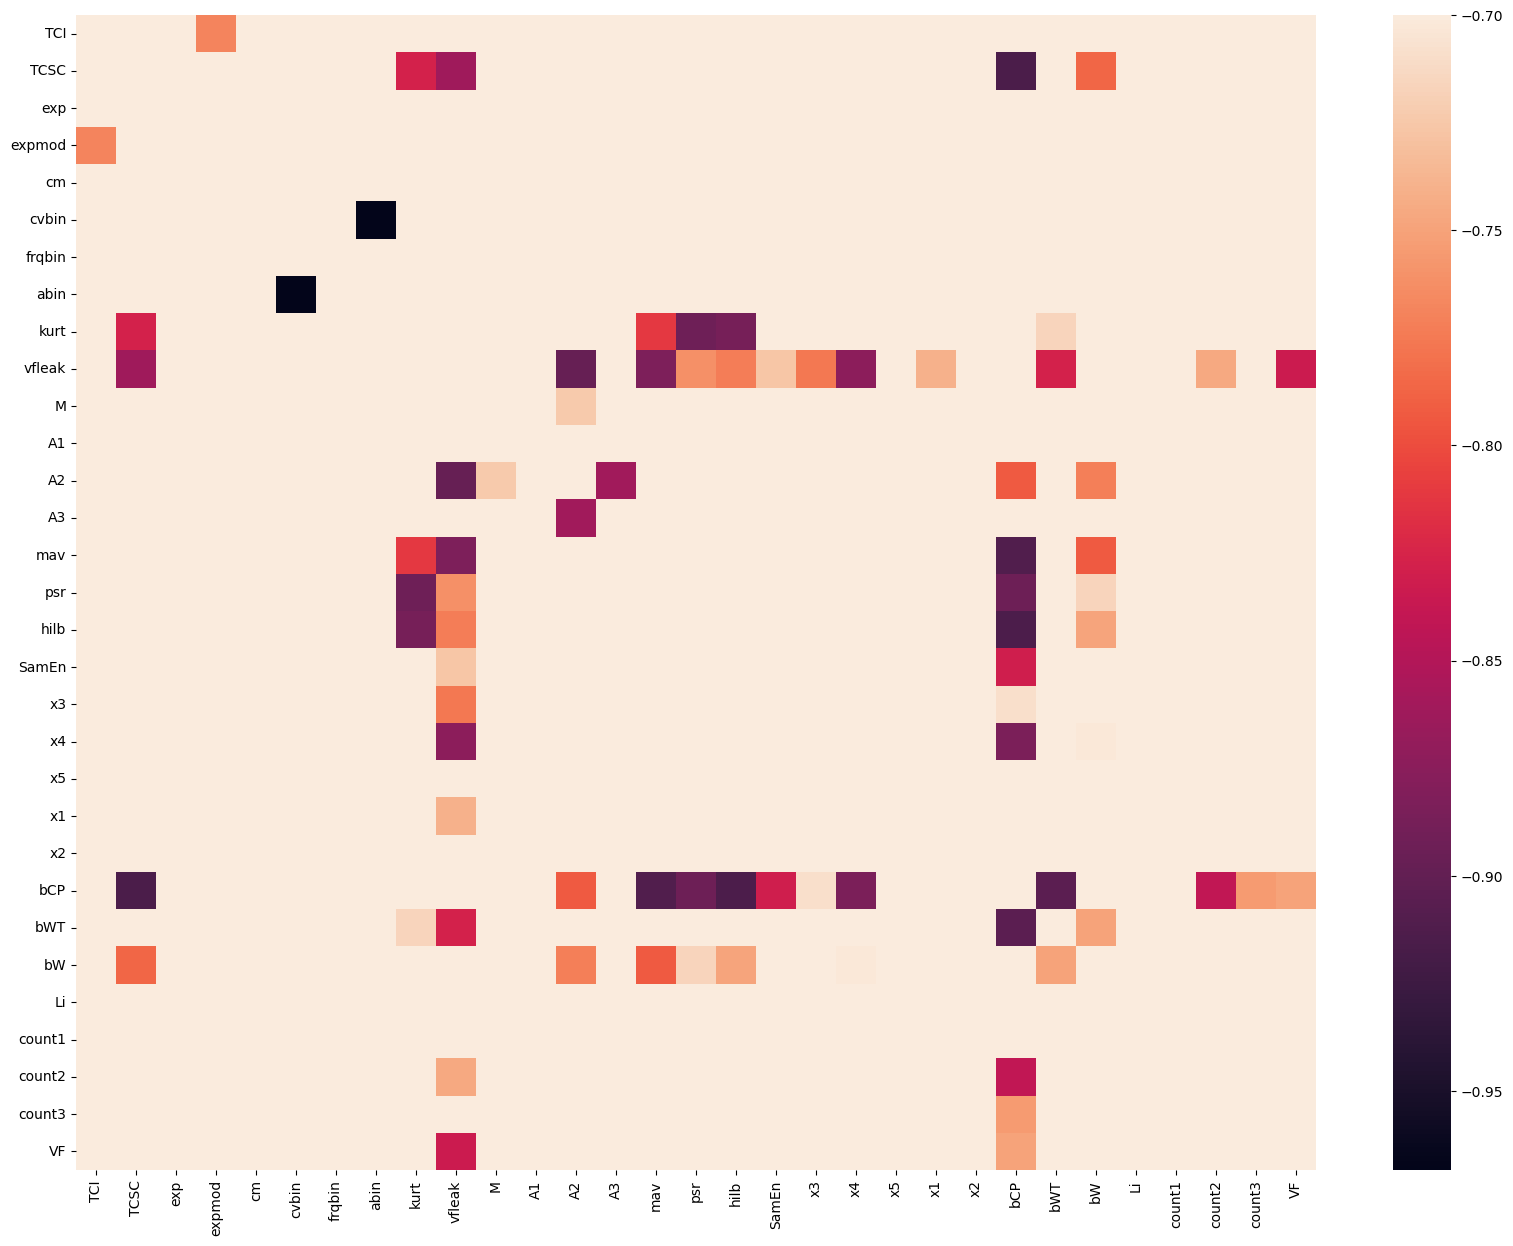

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(d_train.corr(), vmax=-0.7)

<Axes: >

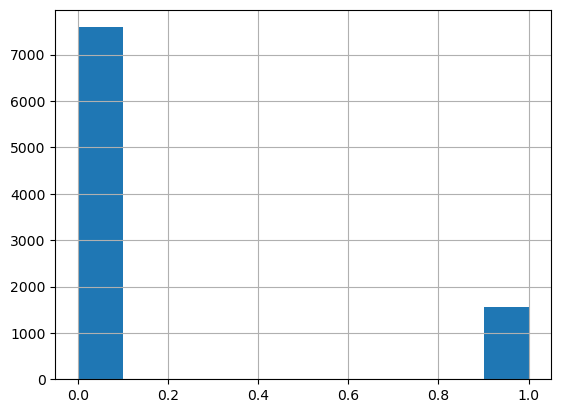

In [15]:
d_train['VF'].hist()

As you can see just over. The values of 'VF' and our objetive variable, are unbalanced.
This can make overfitting on our model.

Let's select two interesting variables to show a little bit more our data. We are going to take the Minimum Redundancy and Maximal Relevance.

In [3]:
stsc = StandardScaler()

d_train_st = stsc.fit_transform(d_train)
d_train_st_df = pd.DataFrame(d_train_st, columns = d_train.columns)

x = d_train_st_df.iloc[:,:-1].copy()
y = d_train_st_df.iloc[:,-1].copy()

v_mrmr = mrmr_classif(x, y, K=2)

v_mrmr

100%|██████████| 2/2 [00:00<00:00, 54.77it/s]


['x4', 'vfleak']

Text(0, 0.5, 'vfleak')

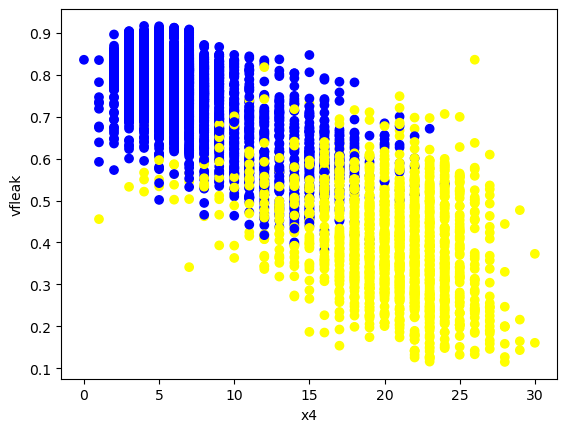

In [22]:
colors = {0:'blue', 1:'yellow'}

plt.scatter(d_train['x4'], d_train['vfleak'], c=d_train['VF'].map(colors))
plt.xlabel('x4')
plt.ylabel('vfleak')

OTHER SCATTER PLOT...

Text(0, 0.5, 'bCP')

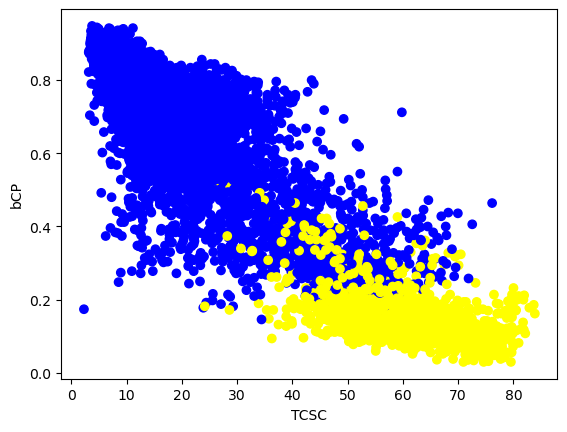

In [26]:
plt.scatter(d_train['TCSC'], d_train['bCP'], c=d_train['VF'].map(colors))
plt.xlabel('TCSC')
plt.ylabel('bCP')

CREATE THE MODEL

In [4]:
seed = 2026

x_train = d_train.iloc[:,:-1].copy()
x_test = d_test.iloc[:,:-1].copy()

y_train = d_train.iloc[:,-1].copy()
y_test = d_test.iloc[:,-1].copy()

Find best C value

In [33]:
list_cv = {'C': [11.51, 11.501, 11.502, 10.503, 11.504, 11.505, 11.506, 11.507, 11.508, 11.509]}
svm_Cv = SVC(kernel='rbf', random_state = seed, class_weight='balanced')
grid_search = GridSearchCV(svm_Cv, list_cv, cv=10)
grid_search.fit(x_train, y_train)

best_C = grid_search.best_params_['C']
print("Best C value:", best_C)

Best C value: 11.51


First try svm.SVC with rbf kernel.

In [34]:
x_trainStscaler = stsc.fit_transform(x_train)
x_testStscaler = stsc.fit_transform(x_test)

svm_rbf = svm.SVC(C=best_C, kernel='rbf', random_state= seed, class_weight='balanced')
y_train_np = y_train.to_numpy(copy=True).flatten()
svm_rbf.fit(x_trainStscaler, y_train_np)
y_pred_train = svm_rbf.predict(x_trainStscaler)
y_pred_test = svm_rbf.predict(x_testStscaler)

In [35]:
accuracy_score(y_train, y_pred_train)


0.999343975508419

In [36]:
accuracy_score(y_test, y_pred_test)

0.995

In [37]:
classification_report(y_train, y_pred_train)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7590\n           1       1.00      1.00      1.00      1556\n\n    accuracy                           1.00      9146\n   macro avg       1.00      1.00      1.00      9146\nweighted avg       1.00      1.00      1.00      9146\n'

In [38]:
classification_report(y_test, y_pred_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       170\n           1       0.97      1.00      0.98        30\n\n    accuracy                           0.99       200\n   macro avg       0.98      1.00      0.99       200\nweighted avg       1.00      0.99      1.00       200\n'

In [39]:
def balanced_accuracy(model_name, sc):
    import sklearn.metrics as metrics
    data_onu = pd.read_csv('data_test.csv')
    X_onu = data_onu.drop('VF',axis=1)
    X_testscaled = sc.transform(X_onu)
    y_onu = data_onu['VF']
    y_pred_onu = model_name.predict(X_testscaled)
    BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
    print(f'{round(BER*100,4)}%')

In [40]:
balanced_accuracy(svm_rbf, stsc)

0.2941%


Let's try with poly kernel.

In [46]:
list_cvp = {'C': [3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14]}
svm_Cvp = SVC(kernel='poly', random_state = seed, class_weight='balanced')
grid_searchp = GridSearchCV(svm_Cvp, list_cvp, cv=10)
grid_searchp.fit(x_train, y_train)

best_Cp = grid_searchp.best_params_['C']
print("Best C value:", best_Cp)

Best C value: 3.09


In [47]:
svm_poly = svm.SVC(C=best_Cp, kernel='poly', degree=5, random_state= seed, class_weight='balanced')
y_train_np_p = y_train.to_numpy(copy=True).flatten()
svm_poly.fit(x_trainStscaler, y_train_np_p)
y_pred_train_p = svm_poly.predict(x_trainStscaler)
y_pred_test_p = svm_poly.predict(x_testStscaler)

In [48]:
accuracy_score(y_train, y_pred_train_p)

0.998906625847365

In [49]:
accuracy_score(y_test, y_pred_test_p)

0.995

In [50]:
classification_report(y_train, y_pred_train_p)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7590\n           1       1.00      1.00      1.00      1556\n\n    accuracy                           1.00      9146\n   macro avg       1.00      1.00      1.00      9146\nweighted avg       1.00      1.00      1.00      9146\n'

In [51]:
classification_report(y_test, y_pred_test_p)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       170\n           1       0.97      1.00      0.98        30\n\n    accuracy                           0.99       200\n   macro avg       0.98      1.00      0.99       200\nweighted avg       1.00      0.99      1.00       200\n'

In [53]:
balanced_accuracy(svm_poly, stsc)

0.2941%
